@Author: David D. Gaviria

@Gmail: blobquiet@gmail.com

# Zero deforestation mission

Deforestation is the permanent removal of standing forests, which occurs for a variety of reasons and has many devastating consequences. The loss of trees and other vegetation can cause climate change, desertification, soil erosion, fewer crops, flooding, increased greenhouse gases in the atmosphere, and a host of problems for Indigenous people. In the last 13 years, more than 43 million hectares of forest have been devastated in the world, an area the size of California, USA. It is important to stop deforestation, as soon as possible, before the damage is irreversible. There are many ways to fight deforestation. This challenge will consist of using the help of thousands of satellites in space to capture images of the earth's surface in order to detect, as soon as possible, areas in the midst of deforestation and prevent its expansion.

# Tasks

1.  Create a classification predictive model in order to be able to classify the testing images. First train your model with the training images, once you have the model that maximize the f1-score (macro.) use the test images as input for your model.
2.  Create a presentation (MAX 4 slides) explaining what you have done and why you have done it. 

# Dataset
For this challenge, you will have 2 CSVs: Train and Test. As their names indicate, the first one will be used to train your classification model on the forest images and test to know to which label they belong. It is important to remember to be careful with the paths for reading images in the train_test_data folder.

You will have the following attributes to be able to make the classifications:

-   latitude: Where the photo latitude was taken.
-   longitude: Where the photo longitude was taken.
-   year: Year, in which the photo was taken.
-   example_path: Path where the sample image is located.
- label: In this column you will have the following categories:
 - 'Plantation':Encoded with number 0, Network of rectangular plantation blocks, connected by a well-defined road grid. In hilly areas the layout of the plantation may follow topographic features. In this group you can find: Oil Palm Plantation, Timber Plantation and Other large-scale plantations.
  - 'Grassland/Shrubland': Encoded with number 1, Large homogeneous areas with few or sparse shrubs or trees, and which are generally persistent. Distinguished by the absence of signs of agriculture, such as clearly defined field boundaries.
  - 'Smallholder Agriculture': Encoded with number 2, Small scale area, in which you can find deforestation covered by agriculture, mixed plantation or oil palm plantation.



# Colab (only)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check GPU assigned

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e1dc3f9a-8bc5-912d-ca63-358250bd157b)


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Nov 19 21:49:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
!rm -r sample_data

Install libraries

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 23.4 MB/s 
     |████████████████████████████████| 168 kB 68.8 MB/s 
     |████████████████████████████████| 182 kB 72.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 166 kB 65.4 MB/s 
     |████████████████████████████████| 166 kB 76.2 MB/s 
     |████████████████████████████████| 162 kB 78.8 MB/s 
     |████████████████████████████████| 162 kB 75.0 MB/s 
     |████████████████████████████████| 158 kB 67.3 MB/s 
     |████████████████████████████████| 157 kB 80.2 MB/s 
     |████████████████████████████████| 157 kB 78.5 MB/s 
     |████████████████████████████████| 157 kB 79.2 MB/s 
     |████████████████████████████████| 157 kB 80.6 MB/s 
     |████████████████████████████████| 157 kB 76.7 MB/s 
     |████████████████████████████████| 157 kB 76.0 MB/s 
     |███████████████████████████

In [ ]:
!git clone https://github.com/rwightman/pytorch-image-models
!cd pytorch-image-models && pip install -e .

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 11737, done.
remote: Counting objects: 100% (646/646), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 11737 (delta 450), reused 536 (delta 392), pack-reused 11091
Receiving objects: 100% (11737/11737), 20.84 MiB | 17.75 MiB/s, done.
Resolving deltas: 100% (8609/8609), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/pytorch-image-models
     |████████████████████████████████| 182 kB 32.5 MB/s 
  Running setup.py develop for timm


In [ ]:
pip install pytorch-lightning==1.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 701 kB 36.7 MB/s 
     |████████████████████████████████| 529 kB 53.3 MB/s 


In [ ]:
!pip uninstall albumentations -y

Found existing installation: albumentations 1.2.1
Uninstalling albumentations-1.2.1:
  Successfully uninstalled albumentations-1.2.1


In [ ]:
 !pip install albumentations==1.0.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 8.1 MB/s 


In [ ]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.4 MB/s 


# Import libraries

Import all necessary libraries

In [ ]:
import pytorch_lightning as pl
import wandb
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning import Trainer
import numpy as np
import pandas as pd
from joblib import load
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import DataLoader
import torch
import torchvision
from pathlib import Path
import math
import cv2 
import albumentations as A 
from albumentations.pytorch import ToTensorV2
from skimage.transform import resize

import torch.nn.functional as F
from torchmetrics.functional import accuracy
from torchvision import transforms
import timm
import timm.optim
from torchmetrics import Accuracy, F1Score, Specificity, Precision, Recall, AUROC
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore') 
import torch.optim.lr_scheduler

from tqdm import tqdm
from skimage import io

import torchvision.transforms as transforms
from timm.data.auto_augment import rand_augment_transform, augment_and_mix_transform, auto_augment_transform
from glob import glob
import os
import json

# Data

Loading the data

In [ ]:
!cp /content/drive/MyDrive/Deforestation/train.csv ./
!cp /content/drive/MyDrive/Deforestation/test.csv ./
!unzip /content/drive/MyDrive/Deforestation/train_test_data.zip -d ./

Archive:  /content/drive/MyDrive/Deforestation/train_test_data.zip
   creating: ./train_test_data/test/
  inflating: ./train_test_data/test/1.png  
  inflating: ./train_test_data/test/1000.png  
  inflating: ./train_test_data/test/1001.png  
  inflating: ./train_test_data/test/1002.png  
  inflating: ./train_test_data/test/1004.png  
  inflating: ./train_test_data/test/1005.png  
  inflating: ./train_test_data/test/1006.png  
  inflating: ./train_test_data/test/1007.png  
  inflating: ./train_test_data/test/101.png  
  inflating: ./train_test_data/test/1012.png  
  inflating: ./train_test_data/test/1013.png  
  inflating: ./train_test_data/test/1024.png  
  inflating: ./train_test_data/test/1025.png  
  inflating: ./train_test_data/test/1026.png  
  inflating: ./train_test_data/test/1028.png  
  inflating: ./train_test_data/test/103.png  
  inflating: ./train_test_data/test/1034.png  
  inflating: ./train_test_data/test/1036.png  
  inflating: ./train_test_data/test/1047.png  
  inflat

# Dataframe and EDA

Load encoder or generate in Meta csv bellow

In [ ]:
# load metadata encoder
hot_enconder = load('/content/drive/MyDrive/Deforestation/encoder.joblib')
hot_enconder.transform([[2001]]).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Load training split

In [ ]:
!cp /content/drive/MyDrive/Deforestation/train_split.csv ./
!cp /content/drive/MyDrive/Deforestation/val_split.csv ./

## Meta csv

In [ ]:
meta_train = pd.read_csv("train.csv")
meta_test = pd.read_csv("test.csv")

In [ ]:
meta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         1714 non-null   int64  
 1   latitude      1714 non-null   float64
 2   longitude     1714 non-null   float64
 3   year          1714 non-null   int64  
 4   example_path  1714 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 67.1+ KB


check Dypes and missing values

In [ ]:
meta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         1714 non-null   int64  
 1   latitude      1714 non-null   float64
 2   longitude     1714 non-null   float64
 3   year          1714 non-null   int64  
 4   example_path  1714 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 67.1+ KB


In [ ]:
meta_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      635 non-null    float64
 1   longitude     635 non-null    float64
 2   year          635 non-null    int64  
 3   example_path  635 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 20.0+ KB


In [ ]:
meta_train.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png


In [ ]:
meta_test.head()

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png


In [ ]:
meta_train.year.value_counts().sort_index()

2001     41
2002     55
2003     45
2004     85
2005     95
2006     98
2007    121
2008    124
2009    125
2010    132
2011    124
2012    145
2013    120
2014    101
2015    152
2016    151
Name: year, dtype: int64

In [ ]:
meta_test.year.value_counts().sort_index()

2001    23
2002    25
2003    25
2004    30
2005    38
2006    31
2007    41
2008    49
2009    46
2010    32
2011    37
2012    48
2013    52
2014    39
2015    59
2016    60
Name: year, dtype: int64

In [ ]:
len(meta_train.year.value_counts().sort_index()) == len(meta_test.year.value_counts().sort_index())

True

In [ ]:
nans_meta_train = meta_train.isna().sum()
nans_meta_test = meta_test.isna().sum()
print(nans_meta_train)
print("\n")
print(nans_meta_test)

label           0
latitude        0
longitude       0
year            0
example_path    0
dtype: int64


latitude        0
longitude       0
year            0
example_path    0
dtype: int64


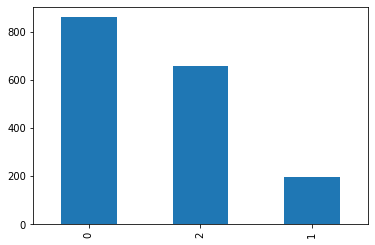

In [ ]:
meta_train["label"].value_counts().plot.bar()

In [ ]:
meta_train[["latitude", "longitude"]].describe()

,latitude,longitude
count,1714.000000,1714.000000
mean,-0.458578,108.696539
std,2.146293,9.136482
min,-8.318462,95.902427
25%,-1.916629,101.627073
50%,-0.417759,104.104074
75%,1.062408,114.274851
max,5.014370,140.900849


### Encode Metadata

In [ ]:
meta_train.columns

Index(['label', 'latitude', 'longitude', 'year', 'example_path'], dtype='object')

In [ ]:
meta_test.columns

Index(['latitude', 'longitude', 'year', 'example_path'], dtype='object')

In [ ]:
hot_enconder = OneHotEncoder()

print("column to be encoded:", meta_train.columns[3])
hot_enconder.fit(meta_train[[meta_train.columns[3]]])
hot_enconder.categories_

column to be encoded: year


[array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016])]

In [ ]:
hot_enconder.categories_

[array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016])]

testing encode

In [ ]:
hot_enconder.transform([[2001]]).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Save OneHot encode

In [ ]:
# # export encoding
# import joblib
# joblib.dump(hot_enconder, 'encoder.joblib')

## Split

In [ ]:
df, df_val = train_test_split(meta_train, random_state=1, test_size=0.1, shuffle=True, stratify=meta_train['label'])
df.to_csv(f'./train_split.csv', index=False)
df_val.to_csv(f'./val_split.csv', index=False)
print(df.shape, df_val.shape)

!cp ./train_split.csv /content/drive/MyDrive/Deforestation/
!cp ./val_split.csv /content/drive/MyDrive/Deforestation/


(1542, 5) (172, 5)


# Dataset Meta

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, imgs, encoder, dataset, labels, trans=None):
        self.imgs = imgs
        self.labels = labels
        self.trans = trans
        encoder = hot_enconder.transform(encoder).toarray()
        self.encoder = encoder
        self.dataset = dataset
        
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, ix):
        encoder = self.encoder[ix]
        meta = np.append(encoder, self.dataset['latitude'][ix])
        meta = np.append(meta, self.dataset['longitude'][ix])
        meta = torch.tensor(meta)

        img = cv2.imread(self.imgs[ix])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.trans:
          img = self.trans(image=img)['image']
          img = torch.tensor(img, dtype=torch.float).permute(2,0,1)
        label = torch.tensor(self.labels[ix], dtype=torch.long)
        return img, meta.float(), label

In [ ]:
class DataModule(pl.LightningDataModule):

    def __init__(
            self,
            path='.',
            file='split',
            batch_size=32,
            train_trans=None,
            val_trans=None,
            num_workers=4,
            pin_memory=True,
            val_size=0.1,
            fold = None,
            **kwargs):
        super().__init__()
        self.path = path
        self.file = file
        self.train_trans = train_trans
        self.val_trans = val_trans
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.pin_memory = pin_memory
        self.val_size = val_size
        self.t_df = None
        self.fold = fold

    def setup(self, stage=None):
        train = pd.read_csv(f'{self.path}/train{self.file}.csv')
        if self.fold is not None:
          train_ = train[train['fold'] != self.fold].reset_index(drop=True)
          val = train[train['fold'] != self.fold].reset_index(drop=True)
          train = train_
          print(f'Fold {self.fold} is validating')
        else:
          self.t_df = train
          val = pd.read_csv(f'{self.path}/val{self.file}.csv')
          print("Training samples: ", len(train))
          print("Validation samples: ", len(val))
        meta_columns = ['year']
        # train dataset
        self.train_ds = Dataset(
            train['example_path'].values,
            train[meta_columns],
            train,
            train['label'].values,
            trans = self.train_trans if self.train_trans else None)
        # val dataset
        self.val_ds=Dataset(
            val['example_path'].values,
            val[meta_columns],
            val,
            val['label'].values,
            trans = self.val_trans if self.val_trans else None
        )

    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=True, pin_memory=self.pin_memory)

    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=False, pin_memory=self.pin_memory)

# Aug

In [ ]:
def transform_aug(im_size):

  train_trans = A.Compose([        
      A.RandomResizedCrop(height = im_size, width = im_size,  scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation = cv2.INTER_CUBIC,p = 1.0),
      A.Rotate(p=0.5),
      A.Flip(p = 0.5),
      A.Affine(mode=4, p=0.5),
      A.Transpose(p=0.5),
      A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.3,  p=0.8),
      A.OneOf([
            A.ColorJitter(brightness=0, contrast=0, saturation=0.3, hue=0.1, p=0.5),
            A.HueSaturationValue(hue_shift_limit=2, sat_shift_limit=15, val_shift_limit=20,p = 0.8),
            ],p=0.8),
      A.ToGray(p=0.2),
      A.ShiftScaleRotate(shift_limit=0, scale_limit=(0.0, 0.05), rotate_limit=0, interpolation=1, border_mode=0, p=0.5),
      A.OneOf([
               A.Blur(blur_limit=5, p=0.5),
               A.GaussNoise(var_limit=(5.0, 10.0), p=0.5),
               ],p=0.5),
      A.IAASharpen(alpha=(0.1, 0.3), lightness=(0.5, 1.0), p=0.5),
      A.Cutout(max_h_size=int(im_size*0.375), max_w_size=int(im_size*0.375), num_holes=1, p=0.5),         
      A.Normalize()
        ])

  val_trans = A.Compose(
      [
       A.SmallestMaxSize(max_size=im_size),
       A.CenterCrop(height=im_size, width=im_size),
      #  A.Normalize(max_pixel_value = 255)
      #  A.Normalize(mean = mean_,std = std_, max_pixel_value = 255)
       A.Normalize()
       ])

  return {"train_trans": train_trans, "val_trans": val_trans}

size=224
dm = DataModule(
    path = './',
    file='_split',
    train_trans=transform_aug(size)['train_trans'],
    # augmix=augmix_,
    # fold=1,
    val_trans=transform_aug(size)['val_trans'])


dm.setup()

Training samples:  1542
Validation samples:  172


Note: be aware to disable `Normalization()` from above to see the images

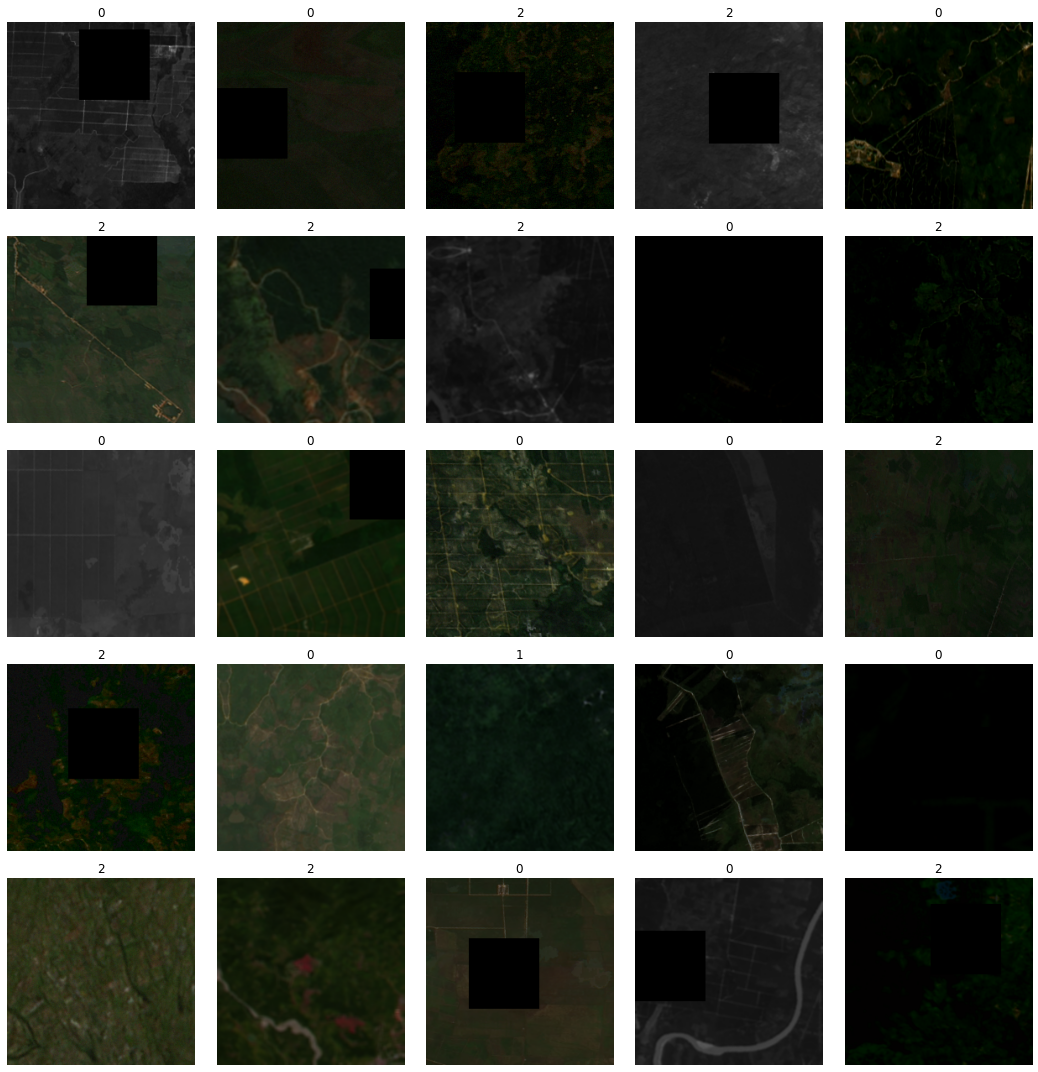

In [ ]:
import random
import matplotlib.pyplot as plt
r, c = 5, 5
fig = plt.figure(figsize=(3*c, 3*r))
ds = dm.train_ds
ix = random.randint(0, len(ds))
for _r in range(r):
    for _c in range(c):
        ix = random.randint(0, len(ds))
        ax = plt.subplot(r, c, _r*c + _c + 1)
        img, _, label = ds[ix]
        plt.axis("off")
        plt.imshow((img/255.).permute(1,2,0))
        plt.tight_layout() 
        plt.title(label.item())
plt.tight_layout
plt.show()

# Model Meta

In [ ]:
class BaseModel(pl.LightningModule):
    def __init__(self, config):
        super().__init__()
        self.save_hyperparameters(config)
        num_class=3
        self.num_class=num_class
        class_names = ['Plantation','Grassland/Shrubland','Smallholder Agriculture']
        self.f1 = F1Score(num_classes=num_class, average='macro')
        self.specificity = Specificity(num_classes=num_class, average='macro')
        self.precision_ = Precision(num_classes=num_class, average='macro')
        self.recall = Recall(num_classes=num_class, average='macro')
        self.auc = AUROC(num_classes=num_class)
        self.learning_rate= self.hparams.lr

    def validation_step(self, batch, batch_idx):
        x, m, y = batch
        y_hat = self(x, m)
        val_loss = F.cross_entropy(y_hat, y)

        val_acc = accuracy(y_hat, y)
        val_bacc = balanced_accuracy_score(y.detach().cpu().numpy(), torch.argmax(y_hat.detach().cpu(), dim=1).numpy())
        val_f1 = self.f1(y_hat, y)
        val_specificity = self.specificity(y_hat, y)
        val_precision = self.precision_(y_hat, y)
        
        self.log('val_loss', val_loss, prog_bar=True)
        self.log('val_acc', val_acc, prog_bar=True)
        self.log('val_bacc', val_bacc, prog_bar=True)
        self.log('val_f1', val_f1)
        self.log('val_specificity', val_specificity)
        self.log('val_precision', val_precision)

        return {"y_hat": y_hat.detach().cpu(), "y": y.detach().cpu()}

    def configure_optimizers(self):
        if 'AdamP' == self.hparams.optimizer:
          print('AdamP')
          optimizer = getattr(timm.optim, self.hparams.optimizer)(self.parameters(), lr=self.hparams.lr)  
        elif 'SGD' == self.hparams.optimizer:
          print('SGD')
          optimizer = torch.optim.SGD(self.parameters(), lr=self.hparams.lr, momentum=0.9, weight_decay =5e-04)
        else:
          print('Else')
          optimizer = getattr(torch.optim, self.hparams.optimizer)(self.parameters(), lr=self.hparams.lr)
        if 'scheduler' in self.hparams:
            scheduler = [(scheduler, params) for scheduler, params in self.hparams.scheduler.items()]
            
    
            scheduler = getattr(torch.optim.lr_scheduler, scheduler[0][0])(optimizer, **scheduler[0][1])
            return [optimizer], [scheduler]
        return optimizer

class Model(BaseModel):

    def __init__(self, config):
        super().__init__(config)
        # meta enconder
        n_features = timm.create_model(self.hparams.backbone,pretrained=self.hparams.pretrained, num_classes = self.num_class).get_classifier().in_features
        self.backbone = timm.create_model(self.hparams.backbone,pretrained=self.hparams.pretrained, num_classes = 0)

        self.meta_model = torch.nn.Sequential(
            torch.nn.Linear(18, 512),
            torch.nn.BatchNorm1d(512),
            torch.nn.Dropout(p=0.3),
            torch.nn.Linear(512, 128),
            torch.nn.BatchNorm1d(128),
        )
        
        self.head = torch.nn.Linear(n_features+128, self.num_class, bias=True)        

    def forward(self, x, meta):        
        x = self.backbone(x)
        # get meta
        meta = self.meta_model(meta)
        # concatenate both
        z = torch.cat([x,meta],1)
        # pass to backbone
        return self.head(z)

    def training_step(self, batch, batch_idx):
        x, m, y = batch
        y_hat = self(x,m)
        loss = F.cross_entropy(y_hat, y, weight=self.hparams.class_weights)
        acc = accuracy(y_hat, y)
        train_bacc = balanced_accuracy_score(y.detach().cpu().numpy(), torch.argmax(y_hat.detach().cpu(), dim=1).numpy())
        train_f1 = self.f1(y_hat, y)
        train_specificity = self.specificity(y_hat, y)
        train_precision = self.precision_(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', acc, prog_bar=True)
        self.log('train_bacc', train_bacc, prog_bar=True)
        self.log('train_f1', train_f1, prog_bar=True, on_step=False, on_epoch=True)
        self.log('train_specificity', train_specificity, prog_bar=False, on_step=False, on_epoch=True)
        self.log('train_precision', train_precision, prog_bar=False, on_step=False, on_epoch=True)
        
        return loss

# Baseline

In [ ]:
wandb.login()
wandb.Api(timeout=19)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
torch.cuda.empty_cache()

In [ ]:
class_weights=None

loss_weight = 1 if class_weights is not None else 0
lr_ = 1e-8
size=224
max_epochs_ = 10
fold_ = 0
config = {
    'lr': lr_,
    'class_weights': class_weights,
    'loss_weight': loss_weight,
    'optimizer': 'AdamP',
    'scheduler':{
        'OneCycleLR':{
            'total_steps': max_epochs_,
            'max_lr': 3e-4
        }  
    },
    'batch_size': 32,
    'val_size': 0.1,
    'max_epochs': max_epochs_,
    'precision': 16,
    'pretrained': True,
    'num_workers': 4,
    'size': size,
    'backbone': 'tf_efficientnet_b0_ns',
    'unfreeze': -1,
    'train_batches': 1.,
    'val_batches': 1.,
    'train_trans': transform_aug(size)['train_trans'],
    'val_trans': transform_aug(size)['val_trans'],
    'fold' : None
}

dm = DataModule(
    path = '.',
    file = '_split',
    **config
)

model = Model(config)

weighted = '-weighted' if config['loss_weight'] else ''

logger_name = ''+config['backbone']+'-'+str(config['size'])+'fold-'+str(fold_)+weighted+'-meta_18'
wandb_logger = WandbLogger(project="deforestation", config=config, name=logger_name, log_model="all")
wandb.define_metric("val_acc", summary="max")
wandb.define_metric("val_bacc", summary="max")
wandb.define_metric("val_auc", summary="max")
wandb.define_metric("val_loss", summary="min")
wandb.define_metric("val_f1", summary="max")

es = EarlyStopping(monitor='val_bacc', mode='max', patience=5)
checkpoint_drive = ModelCheckpoint(dirpath='/content/drive/MyDrive/Deforestation/2019/models', filename=f'{config["backbone"]}-{config["size"]}-{{val_bacc:.5f}}', save_top_k=1, monitor='val_bacc', mode='max')
checkpoint = ModelCheckpoint(monitor="val_f1", mode="max")
lr_monitor = LearningRateMonitor(logging_interval='step')

trainer = pl.Trainer(
    min_epochs=5,
    log_every_n_steps = 50,
    accelerator='auto',
    precision=config['precision'],
    logger= wandb_logger,
    max_epochs=config['max_epochs'],
    # callbacks=[checkpoint],
    limit_train_batches = config['train_batches'],
    limit_val_batches=config['val_batches']
)

trainer.fit(model, dm)

wandb.finish()

# Evaluate

In [ ]:
run = wandb.init()
model_name = 'model-1p8k5gi8:v8' # meta 20 epochs

artifact = run.use_artifact(f'deforestation/deforestation/{model_name}', type='model')
artifact_dir = artifact.download()

wandb: Downloading large artifact model-1p8k5gi8:v8, 124.12MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.8


In [ ]:
model = Model.load_from_checkpoint(checkpoint_path=f'/content/artifacts/{model_name}/model.ckpt')
model.hparams

"backbone":      tf_efficientnet_b3_ns
"batch_size":    32
"class_weights": None
"fold":          None
"loss_weight":   0
"lr":            1e-08
"max_epochs":    20
"num_workers":   4
"optimizer":     AdamP
"precision":     16
"pretrained":    True
"scheduler":     {'OneCycleLR': {'total_steps': 20, 'max_lr': 0.0003}}
"size":          300
"train_batches": 1.0
"train_trans":   Compose([
  RandomResizedCrop(always_apply=False, p=1.0, height=300, width=300, scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=2),
  Rotate(always_apply=False, p=0.5, limit=(-90, 90), interpolation=1, border_mode=4, value=None, mask_value=None),
  Flip(always_apply=False, p=0.5),
  Affine(always_apply=False, p=0.5, interpolation=1, cval=0, mode=4, scale={'x': (0.9, 1.1), 'y': (0.9, 1.1)}, translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)}, translate_px=None, rotate=(-15, 15), fit_output=False, shear={'x': (-10, 10), 'y': (-10, 10)}, cval_mask=0),
  Transpose(always_apply=False, p=0.5),
  RandomBrightne

Meta

In [ ]:
im_size = 300
val_trans_ = A.Compose(
    [
      A.SmallestMaxSize(max_size=im_size),
      A.CenterCrop(height=im_size, width=im_size),
      A.Normalize()
      ])

dm = DataModule(
    path = '.',
    file = '_split',
    batch_size=32,
    val_trans=val_trans_
)

dm.setup()

Training samples:  1542
Validation samples:  172


Meta validation

In [ ]:
num_class = 3
def evaluate(model, dl):
  model.eval()
  model.cuda()
  bacc = []
  f1_score = []
  preds = torch.tensor([]).cuda()
  with torch.no_grad():
      t = tqdm(dl)
      balanced_accuracy = Accuracy(num_classes=num_class, average='macro')
      f1 = F1Score(num_classes=num_class, average='macro').cuda()
      for batch in t:
          x, m, y = batch[0].cuda(), batch[1].cuda(), batch[2].cuda()
          y_hat = model(x,m)
          preds = torch.cat([preds, y_hat])
          f1_ = f1(y_hat, y)
          bacc_ = balanced_accuracy_score(y.detach().cpu().numpy(), torch.argmax(y_hat.detach().cpu(), dim=1).numpy())
          bacc.append(bacc_.item())          
          f1_score.append(f1_.item())          
          #t.set_description(f"acc {np.mean(acc):.5f}")
          #print("\n")
          t.set_description(f"bacc {np.mean(bacc):.5f}")
          t.set_description(f"f1 {np.mean(f1_score):.5f}")
      return preds

val_preds = evaluate(model, dm.val_dataloader())


f1 0.84582: 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]


In [ ]:
val_preds_ = torch.softmax(val_preds, axis=1).cpu().numpy()

In [ ]:
val = pd.read_csv(f'./val_split.csv')
# val = train[train['fold'] != fold_].reset_index(drop=True)
# train = train_
val

,label,latitude,longitude,year,example_path
0,0,4.049781,117.175018,2005,train_test_data/train/390.png
1,0,-1.569383,103.310210,2015,train_test_data/train/992.png
2,0,0.459959,102.180713,2008,train_test_data/train/685.png
3,0,-0.125058,111.779609,2011,train_test_data/train/1821.png
4,2,-8.314457,140.231238,2011,train_test_data/train/1607.png
...,...,...,...,...,...
167,2,1.065794,101.114189,2012,train_test_data/train/1331.png
168,1,0.938762,101.975042,2014,train_test_data/train/1556.png
169,0,-0.343644,109.237489,2005,train_test_data/train/2105.png
170,0,3.319834,117.167116,2006,train_test_data/train/2289.png


In [ ]:
submission_val = pd.DataFrame({'path': val['example_path'].values,
                          '0': val_preds_[...,0],
                          '1': val_preds_[...,1],
                          '2': val_preds_[...,2]})

In [ ]:
submission_val

,path,0,1,2
0,train_test_data/train/390.png,0.956312,0.000821,0.042867
1,train_test_data/train/992.png,0.691725,0.132696,0.175578
2,train_test_data/train/685.png,0.999604,0.000002,0.000395
3,train_test_data/train/1821.png,0.448812,0.012383,0.538805
4,train_test_data/train/1607.png,0.490944,0.025306,0.483750
...,...,...,...,...
167,train_test_data/train/1331.png,0.127311,0.195329,0.677361
168,train_test_data/train/1556.png,0.031760,0.919332,0.048908
169,train_test_data/train/2105.png,0.890136,0.002791,0.107073
170,train_test_data/train/2289.png,0.975168,0.000080,0.024752


In [ ]:
names = '-test'
model_name_ = 'validation-'+model.hparams.backbone + names
submission_val.to_csv(f'/content/drive/MyDrive/Deforestation/evaluation/submission_{model_name_}.csv', index=False)

# Predict

We perform the prediction as the new input for our trained model. Here a TTA strategy is used.

In [ ]:
test = pd.read_csv("test.csv")
test.shape

(635, 4)

In [ ]:
test

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png
...,...,...,...,...
630,1.650899,101.314723,2011,train_test_data/test/968.png
631,-1.645649,102.612332,2010,train_test_data/test/54.png
632,-0.557796,114.561609,2016,train_test_data/test/494.png
633,-3.037549,113.872045,2009,train_test_data/test/287.png


Images and metadata

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, imgs, encoder, dataset, trans=None):
        self.imgs = imgs
        self.trans = trans
        encoder = hot_enconder.transform(encoder).toarray()
        self.encoder = encoder
        self.dataset = dataset

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, ix):
        encoder = self.encoder[ix]
        meta = np.append(encoder, self.dataset['latitude'][ix])
        meta = np.append(meta, self.dataset['longitude'][ix])
        meta = torch.tensor(meta)
        img = cv2.imread(self.imgs[ix])        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.trans:
            img = self.trans(image=img)['image']
        img = torch.tensor(img, dtype=torch.float).permute(2,0,1)
        return img, meta.float()

In [ ]:
def predict(model, dl, tta = 1):
  model.eval()
  model.cuda()
  tta_preds = []
  for i in range(tta):
      preds = torch.tensor([]).cuda()
      with torch.no_grad():
          t = tqdm(dl)
          for b, x_ in enumerate(t):
              x = x_[0].cuda()
              m = x_[1].cuda()
              y_hat = model(x,m)
              preds = torch.cat([preds, y_hat])
      tta_preds.append(preds)
  tta_preds = torch.stack(tta_preds).mean(axis=0)
  return torch.softmax(tta_preds, axis=1).cpu().numpy()

In [ ]:
run = wandb.init()


models_ = [
           'model-27s9h20u:v9', # convnext base meta 384
           'model-234j0954:v7', # efficientnet_b3_ns meta 300
           'model-ppwq1ots:v8', # inception_resnet_v2 meta 299
           'model-3jrjtnui:v8', # efficientnet_b2_ns meta 260
           'model-31ot7e0q:v8',  # efficientnet_b1_ns meta 240
           'model-2c397o1j:v7', # efficientnet_b0_ns meta 224
]

sizes= [
        384,
        300,
        299,
        260,
        240,
        224
]
names = [
    '-model-tta10-meta',
    '-model-tta10-meta',
    '-model-tta10-meta',
    '-model-tta10-meta',
    '-model-tta10-meta',
    '-model-tta10-meta',
    ]


for i,m in enumerate(models_):
  artifact = run.use_artifact(f'deforestation/deforestation/{m}', type='model')
  artifact_dir = artifact.download()

  model = Model.load_from_checkpoint(checkpoint_path=f'/content/artifacts/{m}/model.ckpt')
  model.hparams

  im_size = sizes[i]
  trans_ = A.Compose([
        A.RandomResizedCrop(height = im_size, width = im_size,  scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation = cv2.INTER_CUBIC,p = 1),
        A.Rotate(p=0.5),
        A.Flip(p = 0.5),
        A.Affine(mode=4, p=0.5),
        A.Transpose(p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2,  p=0.5),
        A.HueSaturationValue(hue_shift_limit=2, sat_shift_limit=15, val_shift_limit=20,p = 0.5),
        A.ShiftScaleRotate(shift_limit=0, scale_limit=(0.0, 0.05), rotate_limit=0, interpolation=1, border_mode=0, p=0.5),
        A.OneOf([
                 A.Blur(blur_limit=5, p=0.3),
                 A.GaussNoise(var_limit=(5.0, 10.0), p=0.3),
                 A.IAASharpen(alpha=(0.1, 0.3), lightness=(0.5, 1.0), p=0.4)
                 ],p=0.5),
  A.Normalize()
  ])
  
  meta_columns = ['year']
  dataset = Dataset(test['example_path'], test[meta_columns], test, trans_)
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False, num_workers=4)

  # Compute TTA

  preds = predict(model, dataloader, tta=10)


  # Generate submission

  submission = pd.DataFrame({'image': test['example_path'].values,
                            '0': preds[...,0],
                            '1': preds[...,1],
                            '2': preds[...,2]})
  
  model_name = model.hparams.backbone+ '-'+ m + names[i]
  submission.to_csv(f'/content/drive/MyDrive/Deforestation/predictions/submission_{model_name}.csv', index=False)

wandb: Downloading large artifact model-3jrjtnui:v8, 89.72MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5
100%|██████████| 20/20 [00:06<00:00,  3.11it/s]
wandb: Downloading large artifact model-31ot7e0q:v8, 76.11MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5
100%|██████████| 20/20 [00:05<00:00,  3.43it/s]
wandb:   1 of 1 files downloaded.  
100%|██████████| 20/20 [00:05<00:00,  3.72it/s]


In [ ]:
wandb.finish()

# Ensemble

Perform the ensemble of the predicted values from the best models

In [ ]:
sub_dir = '/content/drive/MyDrive/Deforestation/predictions/'
sorted(glob(os.path.join(sub_dir, '*csv')))

['/content/drive/MyDrive/Deforestation/predictions/submission_convnext_base_384_in22ft1k-model-27s9h20u:v9-model-tta10-meta.csv',
 '/content/drive/MyDrive/Deforestation/predictions/submission_inception_resnet_v2-model-ppwq1ots:v8-model-tta10-meta.csv',
 '/content/drive/MyDrive/Deforestation/predictions/submission_tf_efficientnet_b0_ns-model-2c397o1j:v7-model-tta10-meta.csv',
 '/content/drive/MyDrive/Deforestation/predictions/submission_tf_efficientnet_b1_ns-model-31ot7e0q:v8-model-tta10-meta.csv',
 '/content/drive/MyDrive/Deforestation/predictions/submission_tf_efficientnet_b2_ns-model-3jrjtnui:v8-model-tta10-meta.csv',
 '/content/drive/MyDrive/Deforestation/predictions/submission_tf_efficientnet_b3_ns-model-234j0954:v7-model-tta10-meta.csv']

In [ ]:
subs = [pd.read_csv(csv) for csv in sorted(glob(os.path.join(sub_dir, '*csv')))]
subs

[                             image         0         1         2
 0      train_test_data/test/69.png  0.119736  0.030073  0.850191
 1     train_test_data/test/469.png  0.029126  0.033613  0.937261
 2       train_test_data/test/6.png  0.965559  0.003034  0.031407
 3     train_test_data/test/351.png  0.039154  0.176466  0.784380
 4    train_test_data/test/1001.png  0.080844  0.007252  0.911904
 ..                             ...       ...       ...       ...
 630   train_test_data/test/968.png  0.057230  0.007388  0.935381
 631    train_test_data/test/54.png  0.136741  0.051605  0.811654
 632   train_test_data/test/494.png  0.045158  0.305560  0.649282
 633   train_test_data/test/287.png  0.987665  0.001261  0.011074
 634   train_test_data/test/603.png  0.840076  0.016880  0.143044
 
 [635 rows x 4 columns],
                              image         0             1         2
 0      train_test_data/test/69.png  0.050685  1.416158e-03  0.947899
 1     train_test_data/test/469.png  0.13

In [ ]:
# calculate even weights
wts = [1/(len(subs))]*(len(subs))

# compute average ensemble
label0 = [sub['0'] for sub in subs]
label1 = [sub['1'] for sub in subs]
label2 = [sub['2'] for sub in subs]

label0 = np.sum([wts[i]*label0[i] for i in range(len(wts))],axis=0)
label1 = np.sum([wts[i]*label1[i] for i in range(len(wts))],axis=0)
label2 = np.sum([wts[i]*label2[i] for i in range(len(wts))],axis=0)

# arange submission probabilities
subs_prob = pd.DataFrame({'image': subs[0].image, '0': label0, '1': label1, '2': label2})

ensamble_name = 'ensamble' 
subs_prob.to_csv(f'/content/drive/MyDrive/Deforestation/{ensamble_name}.csv', index=False)

# Thresholding

Since we have realized there is a heavy umbalance in the data we will attempt to rescale with conditional probabilities, following Bayes Theorem. (https://journals.sagepub.com/doi/full/10.1177/0962280218821394)

In [ ]:
weights_loss = [1.9930232558139536, 2.6048632218844983, 8.744897959183673]
classes = ['0','1','2']

Calculate thresholding weights

In [ ]:
df_ = pd.read_csv(f'train.csv').reset_index(drop=True)
print(df_.shape)
df_.label.value_counts()

(1714, 5)


0    860
2    658
1    196
Name: label, dtype: int64

In [ ]:
weights_loss = []
classes = df_['label'].value_counts().index.tolist()
total_images = df_.shape[0]
for c in classes:
    samples = df_['label'].value_counts()[c]
    weights_loss.append(1 / (samples / total_images))
classes = ['0','1','2']
weights_loss


[1.9930232558139536, 2.6048632218844983, 8.744897959183673]

In [ ]:
weights_loss, classes

([1.9930232558139536, 2.6048632218844983, 8.744897959183673], ['0', '1', '2'])

In [ ]:
# load file if needed
# subs_prob = pd.read_csv(f'/content/drive/MyDrive/Deforestation/ensamble.csv').reset_index(drop=True)
preds_thresh_df = subs_prob.copy()
preds_thresh_df.loc[:, classes] *= weights_loss
preds_thresh_df.loc[:, classes] = preds_thresh_df.loc[:, classes].div(preds_thresh_df.sum(axis=1), axis=0)
ensamble_name = 'threshold_ensamble'
preds_thresh_df.to_csv(f'/content/drive/MyDrive/Deforestation/{ensamble_name}.csv', index=False)

In [ ]:
preds_thresh_df

,image,0,1,2
0,train_test_data/test/69.png,0.028110,0.004738,0.967153
1,train_test_data/test/469.png,0.022512,0.012612,0.964876
2,train_test_data/test/6.png,0.751003,0.004917,0.244080
3,train_test_data/test/351.png,0.010994,0.073814,0.915191
4,train_test_data/test/1001.png,0.019882,0.005629,0.974489
...,...,...,...,...
630,train_test_data/test/968.png,0.010782,0.001863,0.987355
631,train_test_data/test/54.png,0.107656,0.025654,0.866690
632,train_test_data/test/494.png,0.016396,0.156513,0.827092
633,train_test_data/test/287.png,0.955602,0.003571,0.040827


# Generate json file

In [ ]:
# Convert csv to json prediction file
preds_thresh_df['target'] = preds_thresh_df[['0','1','2']].idxmax(axis=1)
preds_thresh_df['target'] = preds_thresh_df['target'].astype(int)
predictions = preds_thresh_df[['target']].T
predictions.to_csv('/content/drive/MyDrive/Deforestation/predictions.csv')
result = predictions.to_json(orient="index", date_format='iso')
parsed = json.loads(result)
json_object = json.dumps(parsed, indent=4) 
# Writing to sample.json
with open("/content/drive/MyDrive/Deforestation/predictions.json", "w") as outfile:
    outfile.write(json_object)